<a href="https://colab.research.google.com/github/SamwelJane/White-Blood-Cells-Image-Classification/blob/master/White_Blood_Cell_Images_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Of White Blood Cells Using Neural Networks 


>## Context
>***
> ### Definition
> White Blood Cells (WBC), also known as leukocytes, play an important role in the immune system by defending the body against infectious diseases and foreign invaders. A healthy adult's WBC's count ranges between 4,000 and 11,000 WBCs per cubic millimeter of blood depending on the gender, age and level of activity among other factors.
>
> An abnormal increase of white blood cells is known as leukocytosis while an abnormal decrease is known as leukopenia. Both instances indicate that there is an underlying problem or attack on the body and the immune system has reacted by either increasing the white blood cells to fight off infection, allergies or foreign agents or decreasing the white blood cells as a result of certain infections, drugs administered or other factors that can inhibit the production and replacement of white blood cells in the body.
>
>
>---
>
>
> ### Types and Subtypes of White Blood Cells and their Functions
> White Blood Cells are highly differentiated based on their specific function(s) in the human body. Below is a list of white blood cell types and subtypes with a general description of their functions with regards to body immunity:
> #### 1. Granulocytes
> These cells are responsible for both innate(natural) and adaptive immune responses in the fight against viral and parasitic infections. They are also responsible for inflammation and detection and dealing with allergies. The types of granulocytes include:
>
>  - **Basophils**    : they release anticoagulant sunstances and antibodies to fight against hypersensitivity(allergies)
>  - **Neutrophils**  : they are partof the innate immune system whose role is to fight bacteria
>  - **Eosinophils**  :  they release toxins that kill pathogens
>
> #### 2. Monocytes 
> These cells are also known as scavenger cells that kill pathogens and clean up cellular debris from infection sites.
> 
> #### 3. Lymphocytes
> Lymphocyte cells are responsible for the identification and removal of foreign invaders from the body.

>## Problem Statement
> ****
> **Problem**
>
> Identification of white blood cells from microscopic images of blood samples through counting and classification is an important step in aiding haematologists in diagnosis of certain diseases (such as leukemia and HIV)  and causes of ailment or bodily discomfort(such as allergies). Manual analysis and classification of white blood cells from microscopic images proves difficult due to the following reasons:
> - Subject to bias
> - innacurate classification due to human errors
> - Variations in the maturition stage
> - Intra class variations of cell shapes due to different acquisition and staining processes
> - Poor sensitivity
>
> These challenges pose a need to develop an automated system to be used for the classification of white blood cells using machine learning that includes image processing, pattern recognition and deep learning techniques to provide both qualitative and quantitative evaluation, precise results and rapid processing.
>
>
> **Solution**
>
> By the use of a convolutional neural network, we aim to correctly classify the white blood cells into their respective categories
> 
> ***Model 1***
>
> Buiding a neural network to classify which of the following categories the a white blood cell cell observed under the microscope falls:
> - Eosinophil
- Lymphocyte
- Monocyte
- Neutrophil
>
> ***Model 2***
>
> Building a neural network that classifies whether the observed cell in a mononuclear or a polynuclear cell. 


>## Experimental Research Design
>****
>
>True Experimental Research Design This is the methodology we will to use for this research experiment.
>
>A true experiment research design is a type of experimental design used to test and reject or fail to reject a hypothesis by using statistical analysis as the means of investigation. This type of experiment can also be used to determine cause and effect relationships within groups.
>
>The following are the assumptions that must be satisfied in order to use the true experiment research design :
>
>- Control group and experimental group
- Researcher - manipulated variable(s)
- Random distribution

>## Metrics for Success
> ***
> The following metrics will be used as instruments to evaluate the performance of the model and determine whether or not it can be confidently use to classify white blood cells correctly:
> - Accuracy Score

>## Project Plan
>****
>1. Contextualizing the problem
2. Definition of the research question
3. Defining the evaluation metrics
4. Data Understanding 
5. Exploration of the data
6. Data preparation and cleaning
7. Implementing the solution
8. Evaluation of the model
9. Summary of findings
10. Conclusion

## Loading Libraries and Files

In [0]:

%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix


import cv2
from PIL import Image
from PIL import ImageDraw
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG
from scipy.ndimage import imread

from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

## Loading Data

In [0]:
# Creating a function to load the image data given a specific folder containing the images
def get_data(folder):
    X=[]  # An empty list where we want the image data to be appended
    y=[]  # An empty list where we want the image labels(folder names) to be appended
    z=[]  # An empty list where the other label(mononuclear, polynuclear) to be appended
    for wbc_type in os.listdir(folder): # Creating a for loop to iterate through the given folder and enter into each specific subfolder.
        print(wbc_type)
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']: # If the folder is any of the ones below, the following are the labels for each,
                label = 1
                label2 = 1
            elif wbc_type in ['EOSINOPHIL']:
                label = 2
                label2 = 1
            elif wbc_type in ['MONOCYTE']:
                label = 3
                label2 = 0
            elif wbc_type in ['LYMPHOCYTE']:
                label = 4
                label2 = 0
            else:
                label = 5
                label2 = 0
            for image_filename in tqdm(os.listdir(folder + wbc_type)):  # iterate over the each subfolders and read the pixel values of each image using the opencv library and record the progress using tqdm.
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = cv2.resize(img_file, dsize=(60,80), interpolation=cv2.INTER_CUBIC) # Resize each of the image from the original 480*640 to 60*80 pixels
                    img_arr = np.asarray(img_file)  # Convert each of the image data into an array
                    X.append(img_arr)               # Append each image array into the list create above
                    y.append(label)                 # Append the corresponding label created above as a label to the corresponding image file.
                    z.append(label2)                # Append the corresponding second label created above as a label to the corresponding image file.
    X = np.asarray(X)   # Converting the lists into arrays.
    y = np.asarray(y)
    z = np.asarray(z)
    return X, y, z # The function returns the following three arrays
x_train, y_train, z_train = get_data('dataset2-master/dataset2-master/images/TRAIN/')   # Applying the function into the train folder.
x_test, y_test, z_test = get_data('dataset2-master/dataset2-master/images/TEST/')       # Applying the function into the test folder.

.DS_Store
._.DS_Store
EOSINOPHIL


100%|█████████████████████████████████████████████████████████████████████████████| 2499/2499 [00:05<00:00, 427.58it/s]


LYMPHOCYTE


100%|█████████████████████████████████████████████████████████████████████████████| 2483/2483 [00:05<00:00, 465.67it/s]


MONOCYTE


100%|█████████████████████████████████████████████████████████████████████████████| 2479/2479 [00:05<00:00, 447.78it/s]


NEUTROPHIL


100%|█████████████████████████████████████████████████████████████████████████████| 2499/2499 [00:05<00:00, 449.92it/s]


.DS_Store
._.DS_Store
EOSINOPHIL


100%|███████████████████████████████████████████████████████████████████████████████| 624/624 [00:01<00:00, 419.91it/s]


LYMPHOCYTE


100%|███████████████████████████████████████████████████████████████████████████████| 620/620 [00:01<00:00, 462.68it/s]


MONOCYTE


100%|███████████████████████████████████████████████████████████████████████████████| 620/620 [00:01<00:00, 458.99it/s]


NEUTROPHIL


100%|███████████████████████████████████████████████████████████████████████████████| 624/624 [00:01<00:00, 455.81it/s]


In [0]:
# Checking the shape of the x_train
x_train.shape

(9957, 80, 60, 3)

In [0]:
# Checking the shape of x_test
x_test.shape

(2487, 80, 60, 3)

In [0]:
# Checking the shape of the labels
y_train.shape

(9957,)

In [0]:
# One hot encoding the labels using the keras utility into an array of num_classes dimensions.
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)
z_train = to_categorical(z_train, num_classes=2)
z_test = to_categorical(z_test, num_classes=2)

In [0]:
# Checking the shape of the one hot encoded labels.
y_train.shape

(9957, 5)

## Exploratory Data Analysis

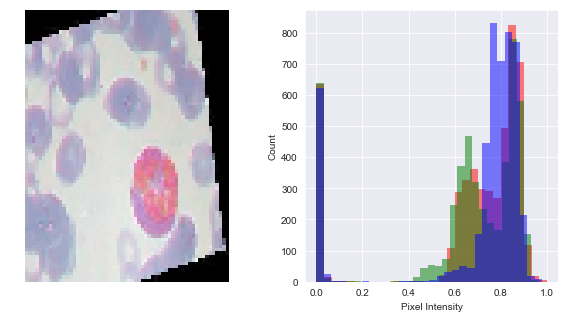

In [0]:
# Plotting a hisstogram of the corresponding RGB intensities of an image.
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(x_train[1])

> The cells under analysis are the red coloured cells. The rest of the cells in the images are the red blood cells.

## Model 1:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 80, 60, 3)         0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 78, 58, 96)        411       
_________________________________________________________________
batch_normalization_1 (Batch (None, 78, 58, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 29, 96)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 37, 27, 128)       13280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 37, 27, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 13, 128)      

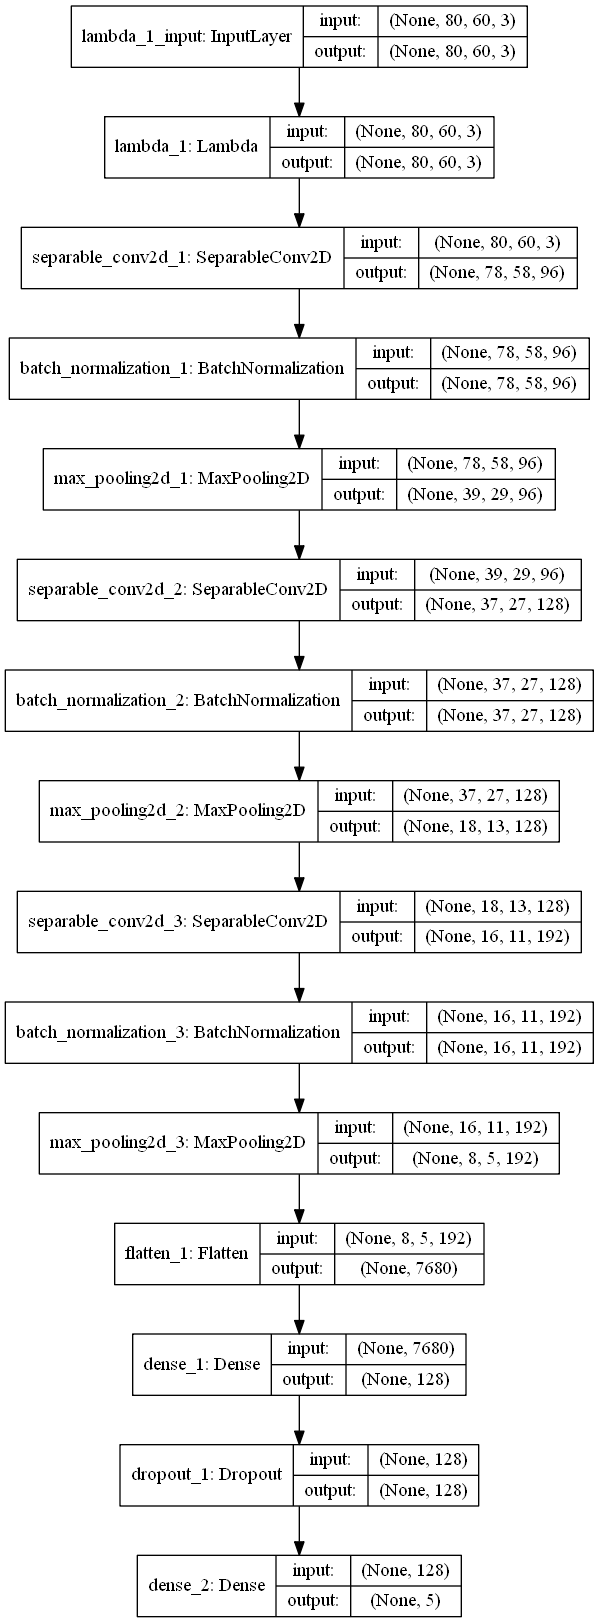

In [0]:
# Creating the model to predict the type of white blood cells.
# Defining the convolution Neural Network layer with the model, number of layers and the number of filters.
def ConvBlock(model, layers, filters):
    for i in range(layers):
        model.add(SeparableConv2D(filters, (3, 3), activation='selu'))
        model.add(BatchNormalization())   # Normalizing the data after every layer
        model.add(MaxPooling2D(2,2))      # Pooling data output after every convolution layer to extract their essential information.
        
def MODEL():
    model = Sequential()
    model.add(Lambda(lambda x: x, input_shape=(80, 60, 3)))
    ConvBlock(model, 1, 96)   # First layer with 96 neurons.
    ConvBlock(model, 1, 128)  # Second layer with 128 neurons.
    ConvBlock(model, 1, 192)  # Third convolution layer with 192 neurons.
    model.add(Flatten())      # Unstacking the multidimensional tensors into a very long 1D tensor for use in the fully connected Dense layer.
    model.add(Dense(128, activation='selu'))  # Adding a fully connected Dense layer of 128 neurons with the Scaled exponential Units activation function.
    model.add(Dropout(0.5)) # Adding a new dropout layer where 50% of the inputs will be randomly excluded from each update cycle.
    model.add(Dense(5, activation='softmax')) # final Dense layer comprised of 5 neurons(number of labels) using a softmax activation function 
    #that turns logits into probabilities that sum to one that represent probability distributions of a list of potential outcomes.
    return model
model = MODEL()
model.summary()   # printing the model summary to check the trainable parameters.
SVG(model_to_dot(model).create(prog='dot', format='svg')) # Plotting the model's layers
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
# Scaling the images data from 0 to 1 by dividing them by 255.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
# Previewing the scaled array of the first image.
x_train[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.76470588, 0.77647059, 0.80784314],
        [0.80784314, 0.78823529, 0.82352941],
        [0.83137255, 0

In [0]:
# Compiling the model. Here, Keras uses the efficient tensorflow library to choose the best way to represent the network for training and making predictions to run on my hardware i.e. CPU
# The defined loss is categorical cross entropy as we are measuring the performance of the model whose output values are probabilities between 0 and 1.
# Te optimizer algorithm used is Adam. this is because Adam can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data
# Accuracy was used as the metric for success. this is the percentage of correct predictions made by the model divided by the total predictions.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# The model was created to go through the training data 20 times(epochs), each time through batches of  250 images before updating the weights and biases. 
epochs=20
predict=model.fit(x_train,y_train, batch_size=250,epochs=epochs)

In [0]:
# Evaluating the model's performace on the test set.
model.evaluate(x_test, y_test)


2487/2487 [==============================] - ETA: 59 - ETA: 48 - ETA: 43 - ETA: 41 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 38s 15ms/step


[2.8297150204063755, 0.516284704208374]

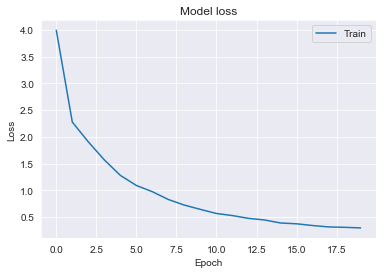

In [0]:
# Plotting the training model loss versus accuracy
plt.plot(predict.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

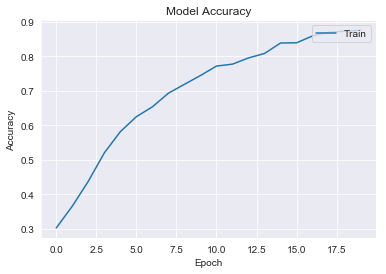

In [0]:
# Plotting the model's accuracy versus epochs.
plt.plot(predict.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [0]:
# Creating a prediction variable containing the output from the models output layer.
predictions = model.predict(x_test, batch_size=10, verbose=0)

In [0]:
# Iterating through the predictions variable.
for i in predictions:
    print(i)

[1.0372462e-12 9.9458081e-01 4.4677025e-03 9.1751642e-04 3.3872224e-05]
[3.4583902e-11 9.9671173e-01 3.2577000e-03 2.7869644e-06 2.7800852e-05]
[3.1894098e-11 9.6495748e-01 3.4394618e-02 6.4278761e-04 5.0122067e-06]
[2.0356642e-12 9.9820626e-01 1.6813530e-03 5.0136549e-07 1.1179741e-04]
[3.1625577e-11 9.1469353e-01 8.3601043e-02 1.6355522e-03 6.9817201e-05]
[4.3682516e-11 9.6071833e-01 3.9277643e-02 1.8242289e-06 2.1634783e-06]
[1.2020608e-12 9.9857771e-01 1.4146712e-03 7.5773391e-06 1.2789264e-11]
[1.5554832e-12 9.9743867e-01 2.5508613e-03 1.0418894e-05 1.7792251e-12]
[7.2357996e-12 7.3075593e-01 2.6919976e-01 4.0163428e-05 4.2224815e-06]
[3.6735535e-11 9.9998331e-01 1.5029080e-05 1.6780363e-06 1.9513328e-08]
[1.3385439e-10 9.9976701e-01 1.4144588e-04 8.4560161e-05 6.9301541e-06]
[2.4195026e-11 1.8089111e-01 8.1019223e-01 8.9138178e-03 2.9266121e-06]
[1.8892394e-12 9.9887484e-01 1.0644401e-03 5.6339250e-05 4.4074936e-06]
[4.6833137e-13 6.6555366e-03 9.9240959e-01 9.3477481e-04 1.01397

In [0]:
# Enantiating another predictions variable, but this time using the predict_classes argument. this returns the label with the most votes

rounded_predictions = model.predict_classes(x_test, batch_size=100, verbose=0)
rounded_predictions

In [0]:
# Checking the unique values of the array created above and confirming that it only contains the four classes from our data.
np.unique(rounded_predictions)

array([1, 2, 3, 4], dtype=int64)

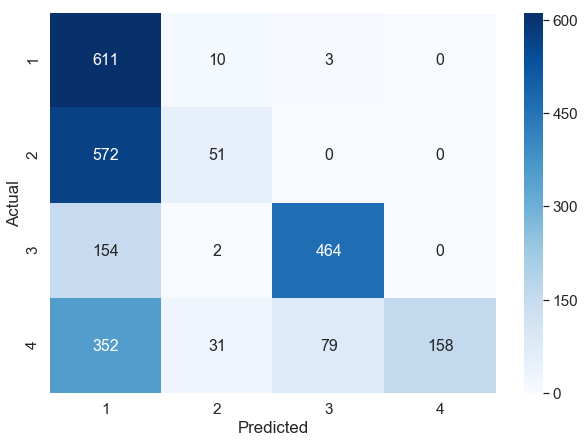

In [0]:
# Plotting a heatmap of the confusion matrix of the model

data = confusion_matrix(test_labels, rounded_predictions)
df_cm = pd.DataFrame(data, columns=np.unique(rounded_predictions), index = np.unique(rounded_predictions))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 16}) # font size
plt.show()

> The model only performs well in classifying class 1. The rest of the classes, it mostly misclassifies them as class 1.

In [0]:
test_images, test_labels, Z_test = get_data('dataset2-master/dataset2-master/images/TEST/')

.DS_Store
._.DS_Store
EOSINOPHIL


100%|███████████████████████████████████████████████████████████████████████████████| 624/624 [00:01<00:00, 462.80it/s]


LYMPHOCYTE


100%|███████████████████████████████████████████████████████████████████████████████| 620/620 [00:01<00:00, 534.52it/s]


MONOCYTE


100%|███████████████████████████████████████████████████████████████████████████████| 620/620 [00:01<00:00, 528.15it/s]


NEUTROPHIL


100%|███████████████████████████████████████████████████████████████████████████████| 624/624 [00:01<00:00, 526.77it/s]


## Model 2

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 80, 60, 3)         0         
_________________________________________________________________
separable_conv2d_9 (Separabl (None, 78, 58, 96)        411       
_________________________________________________________________
batch_normalization_9 (Batch (None, 78, 58, 96)        384       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 39, 29, 96)        0         
_________________________________________________________________
separable_conv2d_10 (Separab (None, 37, 27, 128)       13280     
_________________________________________________________________
batch_normalization_10 (Batc (None, 37, 27, 128)       512       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 13, 128)      

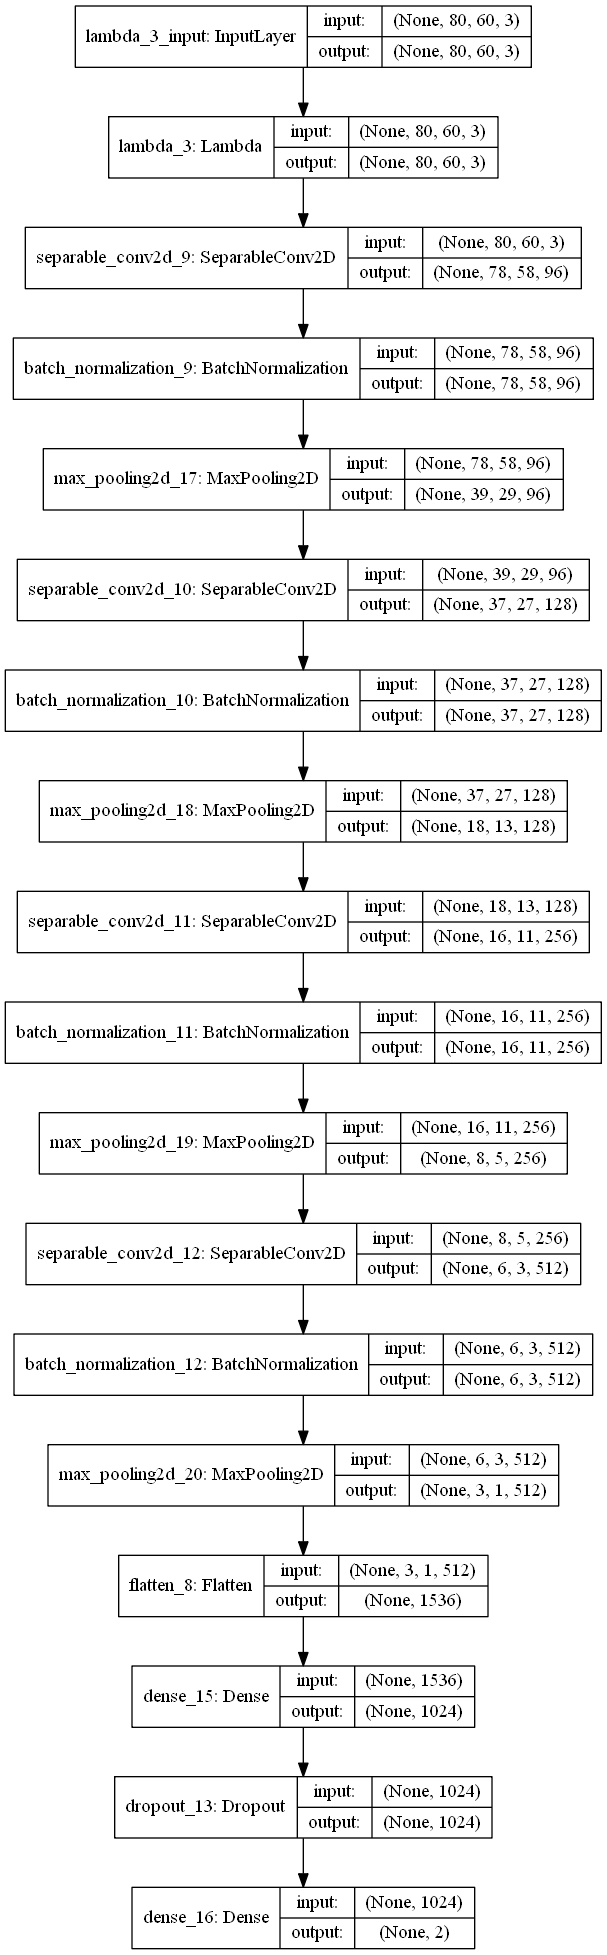

In [0]:
# Creating the model to predict the type of white blood cells, if mononuclear or polynuclear.
# Defining the convolution Neural Network layer with the model, number of layers and the number of filters.
def ConvBlock(model, layers, filters):
    for i in range(layers):
        model.add(SeparableConv2D(filters, (3, 3), activation='selu'))
        model.add(BatchNormalization())   # Normalizing the data after every layer
        model.add(MaxPooling2D(2,2))      # Pooling data output after every convolution layer to extract their essential information.
        
def MODEL():
    model = Sequential()
    model.add(Lambda(lambda x: x, input_shape=(80, 60, 3)))
    ConvBlock(model, 1, 96)   # First CNN layer with 96 neurons.
    ConvBlock(model, 1, 128)  # Second CNN layer with 128 neurons
    ConvBlock(model, 1, 256)  # Third CNN layer with 256 neurons
    ConvBlock(model, 1, 512)  # Fourth CNN layer with 512 neurons
    model.add(Flatten())      # Unstacking the multidimensional tensors into a very long 1D tensor for use in the fully connected Dense layer.
    model.add(Dense(1024, activation='selu')) # Adding a fully connected Dense layer of 1024 neurons with the Scaled exponential Units activation function.
    model.add(Dropout(0.5))   # Adding a new dropout layer where 50% of the inputs will be randomly excluded from each update cycle.
    model.add(Dense(2, activation='softmax'))   # final Dense layer comprised of 2 neurons(number of labels) using a softmax activation function that turns logits into probabilities that sum to one that represent probability distributions of a list of potential outcomes.
    return model
model_1 = MODEL()
model_1.summary() # # printing the model summary to check the trainable parameters.
SVG(model_to_dot(model).create(prog='dot', format='svg')) ## Plotting the model's layers
plot_model(model_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
# Compiling the model. Here, Keras uses the efficient tensorflow library to choose the best way to represent the network for training and making predictions to run on my hardware i.e. CPU
# The defined loss is categorical cross entropy as we are measuring the performance of the model whose output values are probabilities between 0 and 1.
# Te optimizer algorithm used is Adam. this is because Adam can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data
# Accuracy was used as the metric for success. this is the percentage of correct predictions made by the model divided by the total predictions.
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# The model was created to go through the training data 20 times(epochs), each time through batches of  500 images before updating the weights and biases. 
epochs=20
predict=model_1.fit(x_train,z_train, batch_size=500,epochs=epochs)

Epoch 1/20
9957/9957 [==============================] - ETA: 19:48 - loss: 1.2295 - accuracy: 0.508 - ETA: 16:21 - loss: 3.4784 - accuracy: 0.530 - ETA: 14:39 - loss: 7.3089 - accuracy: 0.503 - ETA: 13:15 - loss: 7.2763 - accuracy: 0.497 - ETA: 12:11 - loss: 6.6161 - accuracy: 0.515 - ETA: 11:14 - loss: 6.7761 - accuracy: 0.515 - ETA: 10:14 - loss: 6.6501 - accuracy: 0.514 - ETA: 9:17 - loss: 6.0701 - accuracy: 0.524 - ETA: 8:22 - loss: 5.7816 - accuracy: 0.52 - ETA: 7:34 - loss: 5.6261 - accuracy: 0.52 - ETA: 6:43 - loss: 5.3940 - accuracy: 0.52 - ETA: 5:53 - loss: 5.0732 - accuracy: 0.53 - ETA: 5:06 - loss: 4.8412 - accuracy: 0.53 - ETA: 4:20 - loss: 4.6648 - accuracy: 0.53 - ETA: 3:34 - loss: 4.5017 - accuracy: 0.53 - ETA: 2:50 - loss: 4.2954 - accuracy: 0.54 - ETA: 2:06 - loss: 4.1340 - accuracy: 0.54 - ETA: 1:22 - loss: 4.0111 - accuracy: 0.55 - ETA: 39s - loss: 3.8910 - accuracy: 0.5555 - 845s 85ms/step - loss: 3.7731 - accuracy: 0.5580
Epoch 2/20
9957/9957 [=====================

In [0]:
# Evaluating the performance of the model with accuracy.
accuracy=model_1.evaluate(x_test, z_test, verbose=1)

2487/2487 [==============================] - ETA: 39 - ETA: 38 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 37 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 44s 18ms/step


In [0]:
# Printing the models accuracy.
accuracy

[4.23816216953058, 0.5014073252677917]

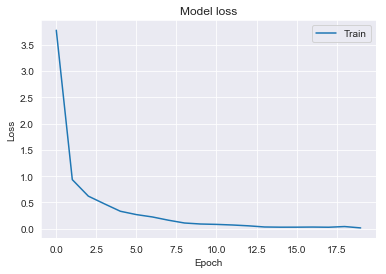

In [0]:
# Plotting the model's loss vs epochs
plt.plot(predict.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

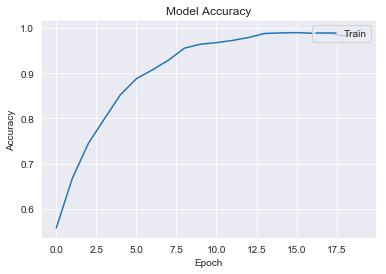

In [0]:
# Plotting the model's accuracy vs accuracy
plt.plot(predict.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

## Predicting each classes images direct from their folder.

In [0]:
# Loading images directly from each folder from the following path
for file in os.listdir('dataset2-master/dataset2-master/images/TEST/NEUTROPHIL'):
    image = Image.open('dataset2-master/dataset2-master/images/TEST/NEUTROPHIL/'+file)
    image = image.resize((80, 60)) # Resizing the image to conform with the training images data.
    image = numpy.array(image, dtype = 'float32')   # Converting the image file into an array
    image/=255    # Normalizing the image data by dividing the image file by 255.
    image = image.reshape(1, 80, 60, 3) # Reshaping the array of the image into a 3D array.
    prediction = model_1.predict(image) # Predicting the label of the image using the pretrained label.
    if numpy.argmax(prediction) == 1: correct+=1  # Appending the correct result to the collect list and if the result is wrong to wrong counter.
    else: wrong+=1 
    total+=1    # adding all predictions to the total counter

print('NEUTROPHIL ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)

NEUTROPHIL ::: Result :  Correct prediction %:  100.0 Wrong prediction : % 0.0


In [0]:
for file in os.listdir('dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE'):
    image = Image.open('dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE/'+file)
    image = image.resize((80, 60))
    image = numpy.array(image, dtype = 'float32')
    image/=255
    image = image.reshape(1, 80, 60, 3)
    prediction = model_1.predict(image)
    #print(numpy.argmax(prediction))
    if numpy.argmax(prediction) == 0: correct+=1
    else: wrong+=1
    total+=1
print('LYMPHOCYTE ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)

LYMPHOCYTE ::: Result :  Correct prediction %:  62.67308850090308 Wrong prediction : % 37.32691149909693


In [0]:
for file in os.listdir('dataset2-master/dataset2-master/images/TEST/MONOCYTE'):
    image = Image.open('dataset2-master/dataset2-master/images/TEST/MONOCYTE/'+file)
    image = image.resize((80, 60))
    image = numpy.array(image, dtype = 'float32')
    image/=255
    image = image.reshape(1, 80, 60, 3)
    prediction = model_1.predict(image)
    #print(numpy.argmax(prediction))
    if numpy.argmax(prediction) == 0: correct+=1
    else: wrong+=1
    total+=1
print('MONOCYTE ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)

MONOCYTE ::: Result :  Correct prediction %:  55.73799750133857 Wrong prediction : % 44.26200249866143


> ## Summary of Findings
> *** 
> 1. The data has has equal proportions of the categories of the labels/white blood cells. All the categories are equally represented thus reducing the chances of bias towards one category because of the frequency of representaaation.
> 2. The first model stabilized/plateaued after 20 epochs while the second model stabilized after about 13 epochs
>